# WeRateDogs data insights

<a id='introduction'></a>
## Introduction

_The following is a description of all efforts done to make the clean file `twitter-archive-enhanced.csv`. The code and steps done can be checked in `wrangle_act.ipynb`._

At this point, you may be wondering, "OK, WeRateDogs is a great profile but... what is their most popular content? What are the most common breeds?" These questions and more will be answered in the following report. I decided to analyze 2000+ tweets from WeRateDogs between the years 2015 and 2017 to solve your doubts.

But first, lets load the necessary libraries and data.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

df = pd.read_csv("twitter_archive_master.csv")

<a id='analysis'></a>
## Analysis

Before starting the analysis, it'd great to get an overview of the dataset.



In [2]:
df.head(3)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text_x,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2356 non-null   int64  
 1   in_reply_to_status_id_x  2356 non-null   int64  
 2   in_reply_to_user_id_x    2356 non-null   int64  
 3   timestamp                2356 non-null   object 
 4   source_x                 2356 non-null   object 
 5   text_x                   2356 non-null   object 
 6   expanded_urls            2356 non-null   object 
 7   rating_numerator         2356 non-null   int64  
 8   rating_denominator       2356 non-null   int64  
 9   name                     2356 non-null   object 
 10  term                     2356 non-null   object 
 11  truncated                1163 non-null   object 
 12  entities                 1163 non-null   object 
 13  extended_entities        834 non-null    object 
 14  in_reply_to_screen_name 

We will start by analyzing **how WeRateDogs have been tweeting along that timeframe**. To do that, we'll plot an histogram to get a visual representation of it.

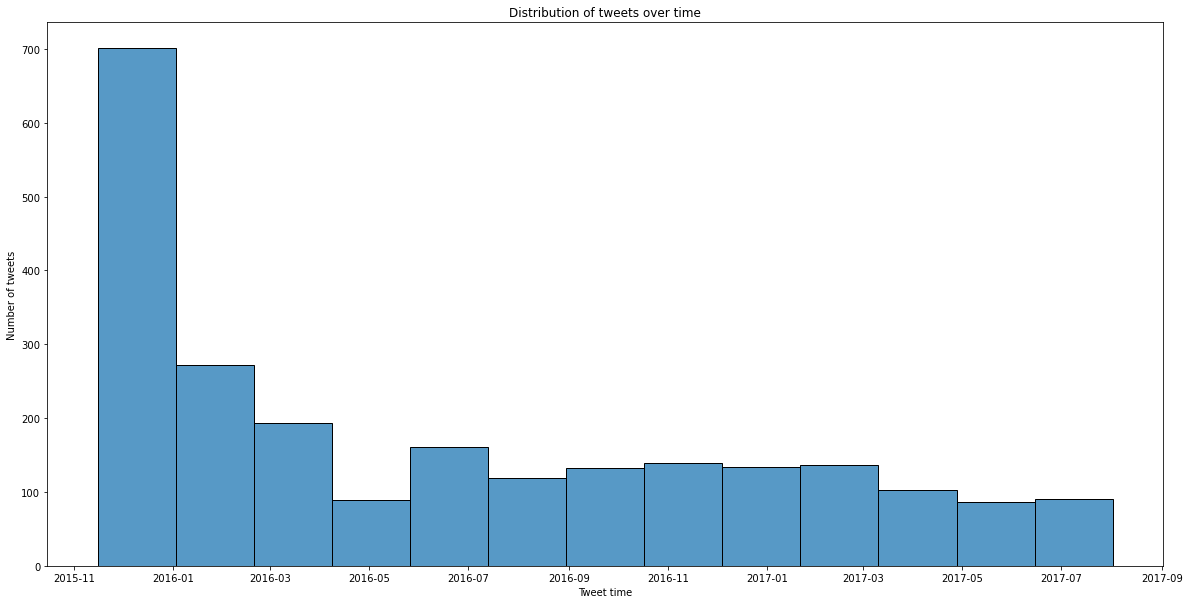

In [4]:
#Convert timestamp to date_time
df["timestamp"] = pd.to_datetime(df["timestamp"])
#Plot graph
figure(figsize=(20,10))
sns.histplot(df["timestamp"])
plt.xlabel("Tweet time")
plt.ylabel("Number of tweets")
plt.title("Distribution of tweets over time");

The graph above shows the amount of tweets posted by the account between November 15th, 2015 and August 1st, 2017. The distribution is right skewed so more tweets were posted in the early stages of the account. This might be related to the fact they were less known by that time. Some social media profiles, as they began to be more known, they stop releasing content so frequently. This, in some cases, is not to make their audience go bored.

Another really important question that people ask a lot is about the most **common dog breed posted in WeRateDogs**. To answer this, well analyze the data from the algorythm predictions about the pictures.

C:\Users\andrw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


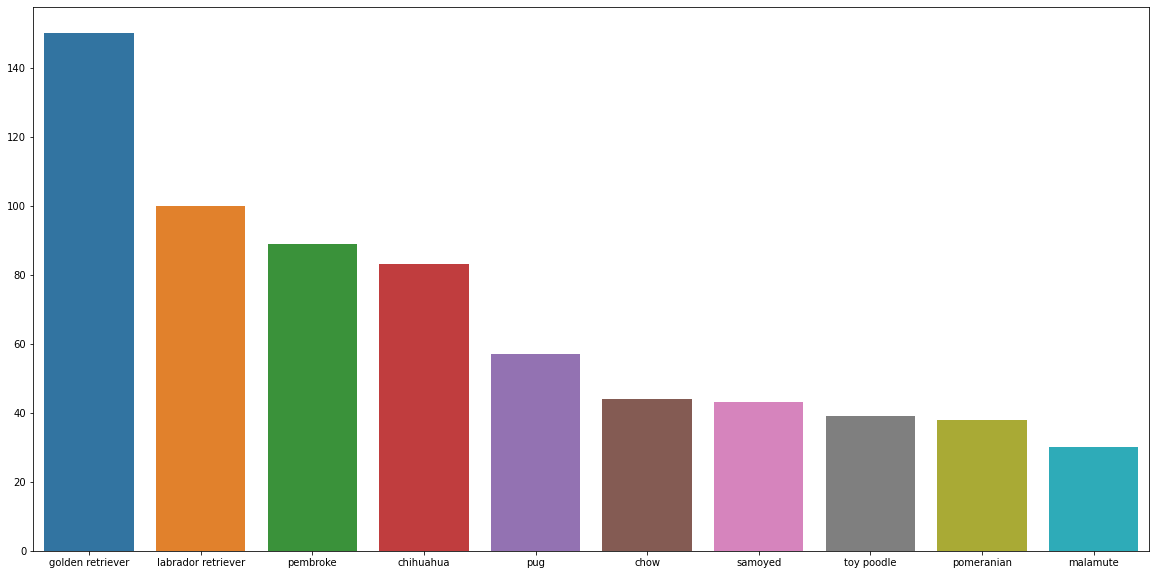

In [5]:
#Define values
breeds = df["p1"].value_counts().index[0:10]
counts = df["p1"].value_counts().values[0:10]
#Plot the graph
figure(figsize=(20,10))
sns.barplot(breeds, counts);

The most common dog breed identified by the algorithm was the golden retriever with 150 results. It is follow by the labrador retriever with 100 and the pembroke, also known as corgi, with 89. This result only applies to the 2075 observations catched by the algorithm. Reality may vary.

But, can we say that golden retriever is the most common dog breed posted in WeRateDogs? Of course not. We do not have enough evicende to support that hypothesis. The data we analyzed was only from 2015 to 2017. They may be biased when posting content about this type of dogs. Maybe they attract more audience, maybe they look more cute... we don't know that for sure based on this data.

Other question that may come to your mind is about the **most popular tweet**. We can analyze that by: getting the most liked tweet or the most retweeted one. We'll get both to get out of doubts.

In [6]:
#Most Retweeted
df.sort_values("retweet_count", ascending=False).tweet_id.head(1)

1039    744234799360020481
Name: tweet_id, dtype: int64

In [7]:
#Most Liked
df.sort_values("favorite_count", ascending=False).tweet_id.head(1)

1039    744234799360020481
Name: tweet_id, dtype: int64

It seems that tweet id "744234799360020481" is the most popular one! If we want to retrieve it, we can get the extended url: https://twitter.com/dog_rates/status/744234799360020481. It looks that a doggo in the pool is the most popular tweet between 2015 an 2017!

To finish the analysis, we will study if the **most common dog breeds generate the most popular tweets**. To do that, we need to get the ten most popular tweets, the ten breeds that retrieves the maximum amount of likes and the ten most common breeds.

In [8]:
#Ten most liked tweets
liked = df.sort_values("favorite_count", ascending=False).tweet_id[:10]
#Ten breeds that retrieves the maximum amount of likes
breeds_pop = df[df["tweet_id"].isin(liked)].p1.tolist()
#Ten most common breeds
breeds_common = df["p1"].value_counts().index[0:10].tolist()
#Most liked breeds in most common breeds
for i in breeds_pop:
    if i in breeds_common:
        print(i)

golden retriever
chow
labrador retriever


As we can see, it seems to be right! At least three of the most common dog breeds posted by WeRateDogs are generating the most popular tweets. It looks like they know what they are doing! By posting more content about those type of dogs, the chances of going viral can increase. They should be posting more content about golden retrievers, chows and labrador retrievers!

## Conclusion

There is plenty of data to be analysed from this dataset. Yet, for the purpose of this notebook, what we've done should be enough. We learned that WeRateDogs used to post more in their beginnings. They also love to post about Golden Retrievers and it's a good choice! We've seen that the Golden Retriever was among the ten dog breeds that generated one of the most popular tweets.